<a href="https://colab.research.google.com/github/yofat/MachineLearing/blob/main/retry_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSV TYPE DATA
## LogisticRegession
## Feature engineer
#### https://github.com/rahulvigneswaran/Intrusion-Detection-Systems.git

這筆資料是原作者已將欄未整理好並且去除
可以直接training



[[ 58206   2386]
 [ 45444 204992]]
Accuracy
0.846
precision
0.988
recall
0.819
f-score
0.896
fpr
0.819
tpr
0.961


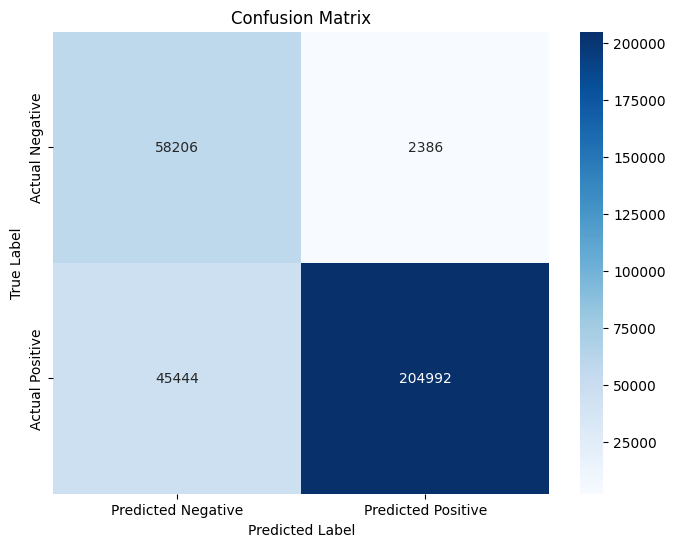

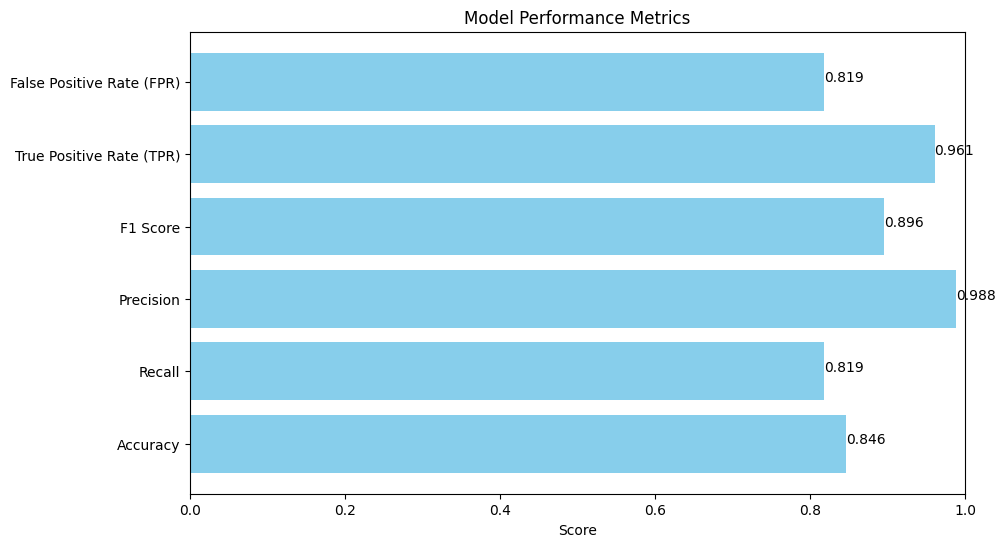

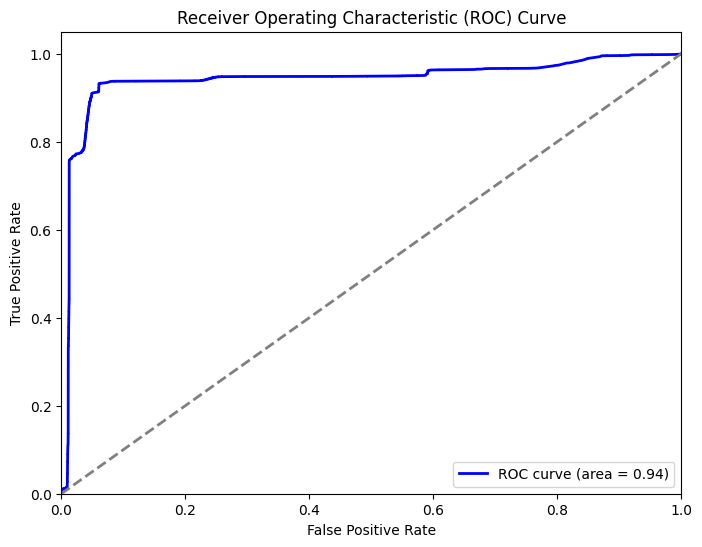

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)

train_data = pd.read_csv("/content/drive/MyDrive/KDD-Dataset/kddtrain.csv")
test_data = pd.read_csv("/content/drive/MyDrive/KDD-Dataset/kddtest.csv")

X = train_data.iloc[:,1:42]
Y = train_data.iloc[:,0]
C = test_data.iloc[:,0]
T = test_data.iloc[:,1:42]

scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

traindata = np.array(trainX)
trainlabel = np.array(Y)

testdata = np.array(testT)
testlabel = np.array(C)


model = LogisticRegression()
model.fit(traindata, trainlabel)

expected = testlabel
predicted = model.predict(testdata)
accuracy = accuracy_score(expected, predicted)
recall = recall_score(expected, predicted, average="binary")
precision = precision_score(expected, predicted , average="binary")
f1 = f1_score(expected, predicted , average="binary")
cm = metrics.confusion_matrix(expected, predicted)
print(cm)
tpr = float(cm[0][0])/np.sum(cm[0])
fpr = float(cm[1][1])/np.sum(cm[1])

print("Accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("recall")
print("%.3f" %recall)
print("f-score")
print("%.3f" %f1)
print("fpr")
print("%.3f" %fpr)
print("tpr")
print("%.3f" %tpr)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plotting metrics
metrics_data = {
    "Accuracy": accuracy,
    "Recall": recall,
    "Precision": precision,
    "F1 Score": f1,
    "True Positive Rate (TPR)": tpr,
    "False Positive Rate (FPR)": fpr
}

metrics_names = list(metrics_data.keys())
metrics_values = list(metrics_data.values())

plt.figure(figsize=(10, 6))
plt.barh(metrics_names, metrics_values, color='skyblue')
plt.xlabel('Score')
plt.title('Model Performance Metrics')
plt.xlim(0, 1)
for index, value in enumerate(metrics_values):
    plt.text(value, index, f"{value:.3f}")
plt.show()


from sklearn.metrics import roc_curve, roc_auc_score

# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(expected, model.predict_proba(testdata)[:, 1])
roc_auc = roc_auc_score(expected, model.predict_proba(testdata)[:, 1])

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# KDD IN BOOK
## Feature
## RandomForestClassifier
### GridSearchCV：他會直接算出最好的參數(用於資料量低的)
#### https://github.com/jmnwong/NSL-KDD-Dataset
#### https://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
#### https://github.com/oreilly-mlsec/book-resources/blob/master/chapter5/nsl-kdd-classification.ipynb
#### https://github.com/PradeepThapa/nsl_kdd_classification/blob/master/NSL_KDD_dataset_code.py#L13
#### https://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

In [ ]:
import os
import numpy as np

# use less data to try
train_file = os.path.join("/content/drive/MyDrive/KDD-Dataset/KDDTrain+.txt")
test_file = os.path.join("/content/drive/MyDrive/KDD-Dataset/KDDTest+.txt")

header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
         'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
         'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
         'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
         'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
         'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
         'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
         'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type',
         'success_pred']


col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

print("col_names:")
print(col_names)

print("nominal_cols:")
print(nominal_cols)

print("binary_cols:")
print(binary_cols)

print("numeric_cols")
print(numeric_cols)

col_names:
['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
 'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
 'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'attack_type' 'success_pred']
nominal_cols:
['protocol_type', 'service', 'flag']
binary_cols:
['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
numeric_cols
['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'n

In [ ]:
import pandas as pd
from collections import defaultdict

category = defaultdict(list)
category['benign'].append('normal')

with open('/content/drive/MyDrive/KDD-Dataset/training_attack_types.txt', 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v, k) for k in category for v in category[k])

print("category:")
print(category)

print("attack_mapping:")
print(attack_mapping)

category:
defaultdict(<class 'list'>, {'benign': ['normal'], 'dos': ['apache2', 'back', 'mailbomb', 'processtable', 'snmpgetattack', 'teardrop', 'smurf', 'land', 'neptune', 'pod', 'udpstorm'], 'u2r': ['ps', 'buffer_overflow', 'perl', 'rootkit', 'loadmodule', 'xterm', 'sqlattack', 'httptunnel'], 'r2l': ['ftp_write', 'guess_passwd', 'snmpguess', 'imap', 'spy', 'warezclient', 'warezmaster', 'multihop', 'phf', 'imap', 'named', 'sendmail', 'xlock', 'xsnoop', 'worm'], 'probe': ['nmap', 'ipsweep', 'portsweep', 'satan', 'mscan', 'saint', 'worm']})
attack_mapping:
{'normal': 'benign', 'apache2': 'dos', 'back': 'dos', 'mailbomb': 'dos', 'processtable': 'dos', 'snmpgetattack': 'dos', 'teardrop': 'dos', 'smurf': 'dos', 'land': 'dos', 'neptune': 'dos', 'pod': 'dos', 'udpstorm': 'dos', 'ps': 'u2r', 'buffer_overflow': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r', 'loadmodule': 'u2r', 'xterm': 'u2r', 'sqlattack': 'u2r', 'httptunnel': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'snmpguess': 'r2l', 'ima

In [ ]:
train_df = pd.read_csv(train_file, names=header_names)
train_df['attack_category'] = train_df['attack_type'].map(lambda x: attack_mapping[x])
train_df.drop(['success_pred'], axis=1, inplace=True)

print("train_attack_category:")
print(train_df['attack_category'])

print("train_df_attack:")
print(train_df['attack_type'])


train_attack_category:
0         benign
1         benign
2            dos
3         benign
4         benign
           ...  
125968       dos
125969    benign
125970    benign
125971       dos
125972    benign
Name: attack_category, Length: 125973, dtype: object
train_df_attack:
0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: attack_type, Length: 125973, dtype: object


In [ ]:
test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'].map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

print("test_attack_category:")
print(test_df['attack_category'])

print("test_df_attack:")
print(test_df['attack_type'])

test_attack_category:
0           dos
1           dos
2        benign
3         probe
4         probe
          ...  
22539    benign
22540    benign
22541       dos
22542    benign
22543     probe
Name: attack_category, Length: 22544, dtype: object
test_df_attack:
0        neptune
1        neptune
2         normal
3          saint
4          mscan
          ...   
22539     normal
22540     normal
22541       back
22542     normal
22543      mscan
Name: attack_type, Length: 22544, dtype: object


In [ ]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

print("train_attack_types:")
print(train_attack_types)

print("train_attack_cats:")
print(train_attack_cats)

train_attack_types:
attack_type
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64
train_attack_cats:
attack_category
benign    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: count, dtype: int64


In [ ]:
test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

print("test_attack_types:")
print(test_attack_types)

print("test_attack_cats:")
print(test_attack_cats)

test_attack_types:
attack_type
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64
test_attack_cats:
attack_catego

<Axes: ylabel='attack_type'>

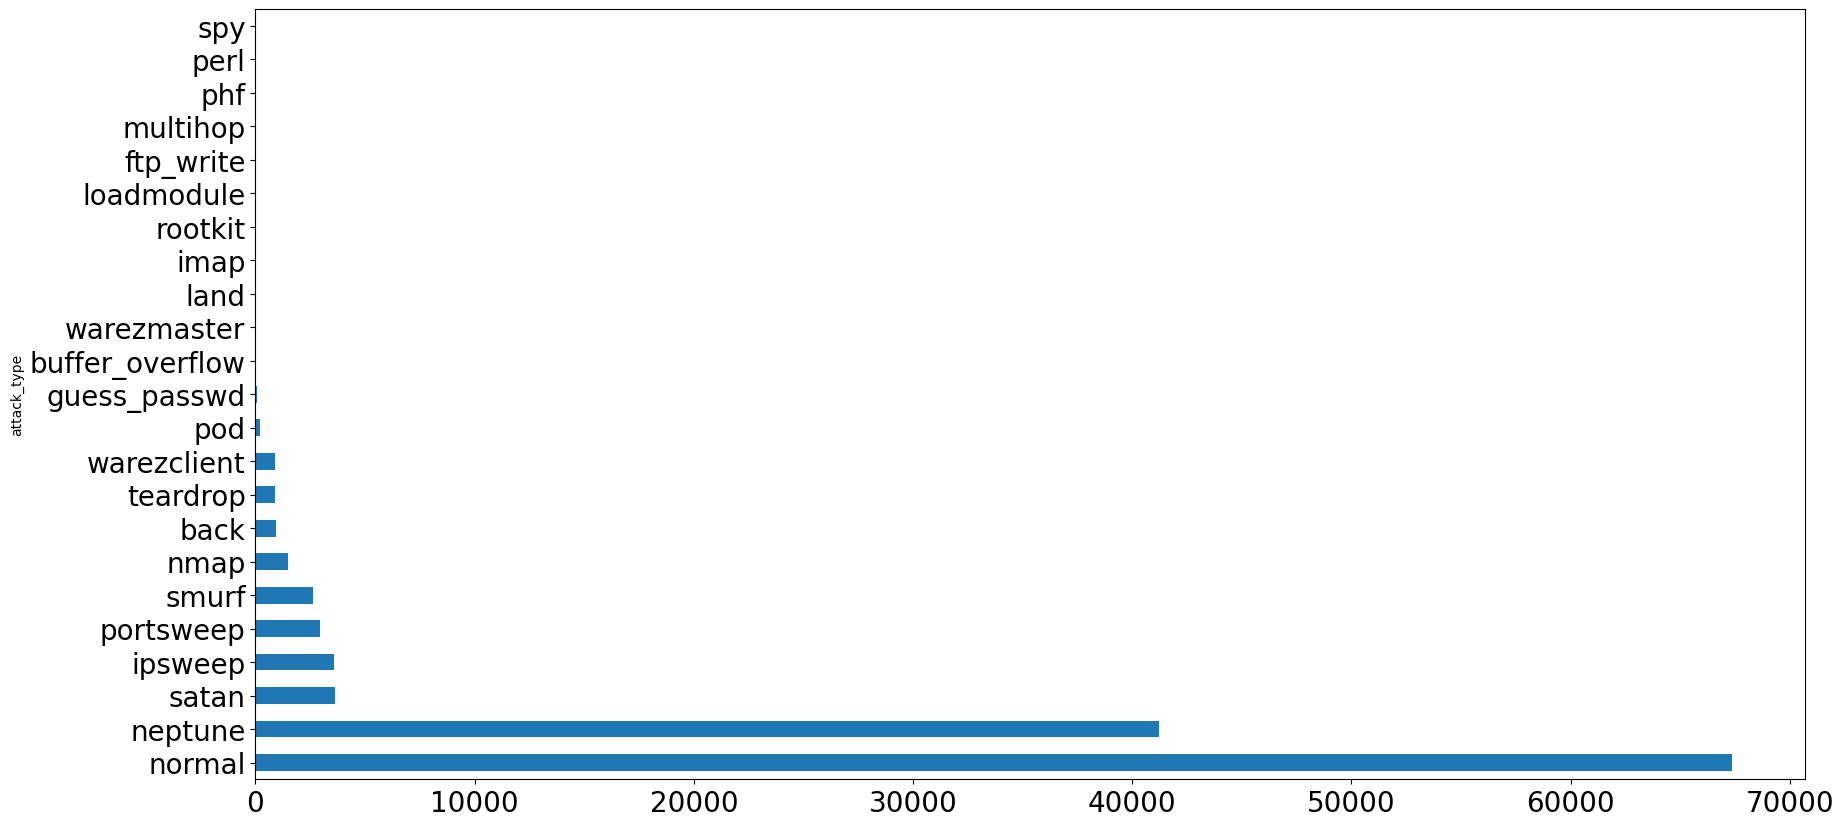

In [ ]:
train_attack_types.plot(kind='barh', figsize=(20, 10), fontsize=20)

<Axes: ylabel='attack_category'>

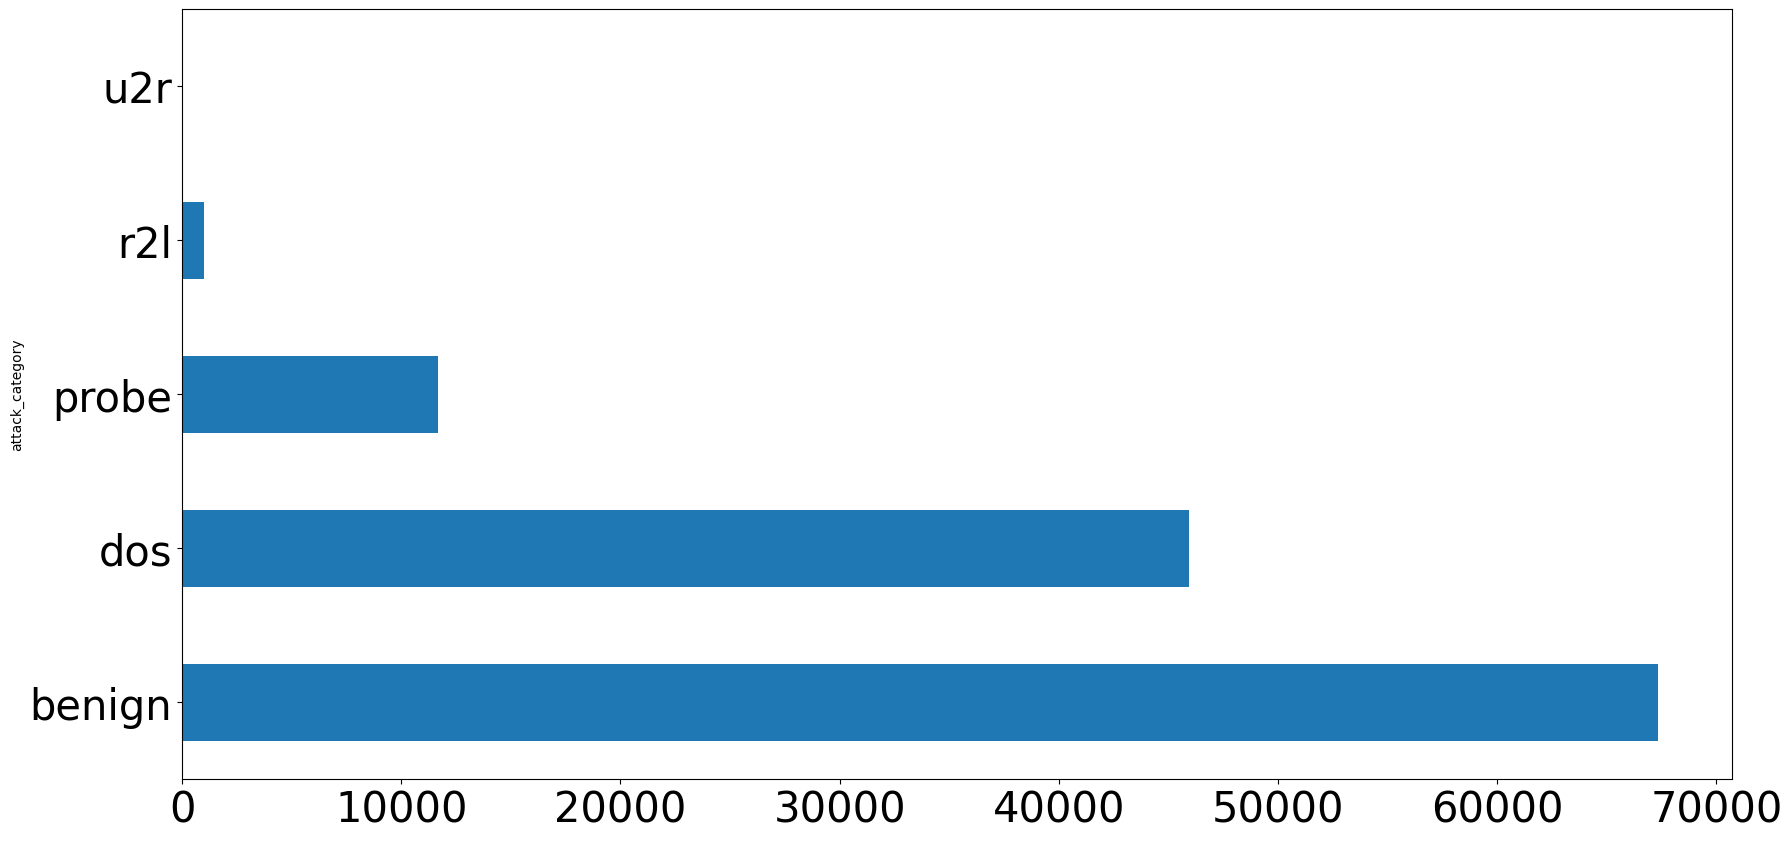

In [ ]:
train_attack_cats.plot(kind='barh', figsize=(20, 10), fontsize=30)

<Axes: ylabel='attack_type'>

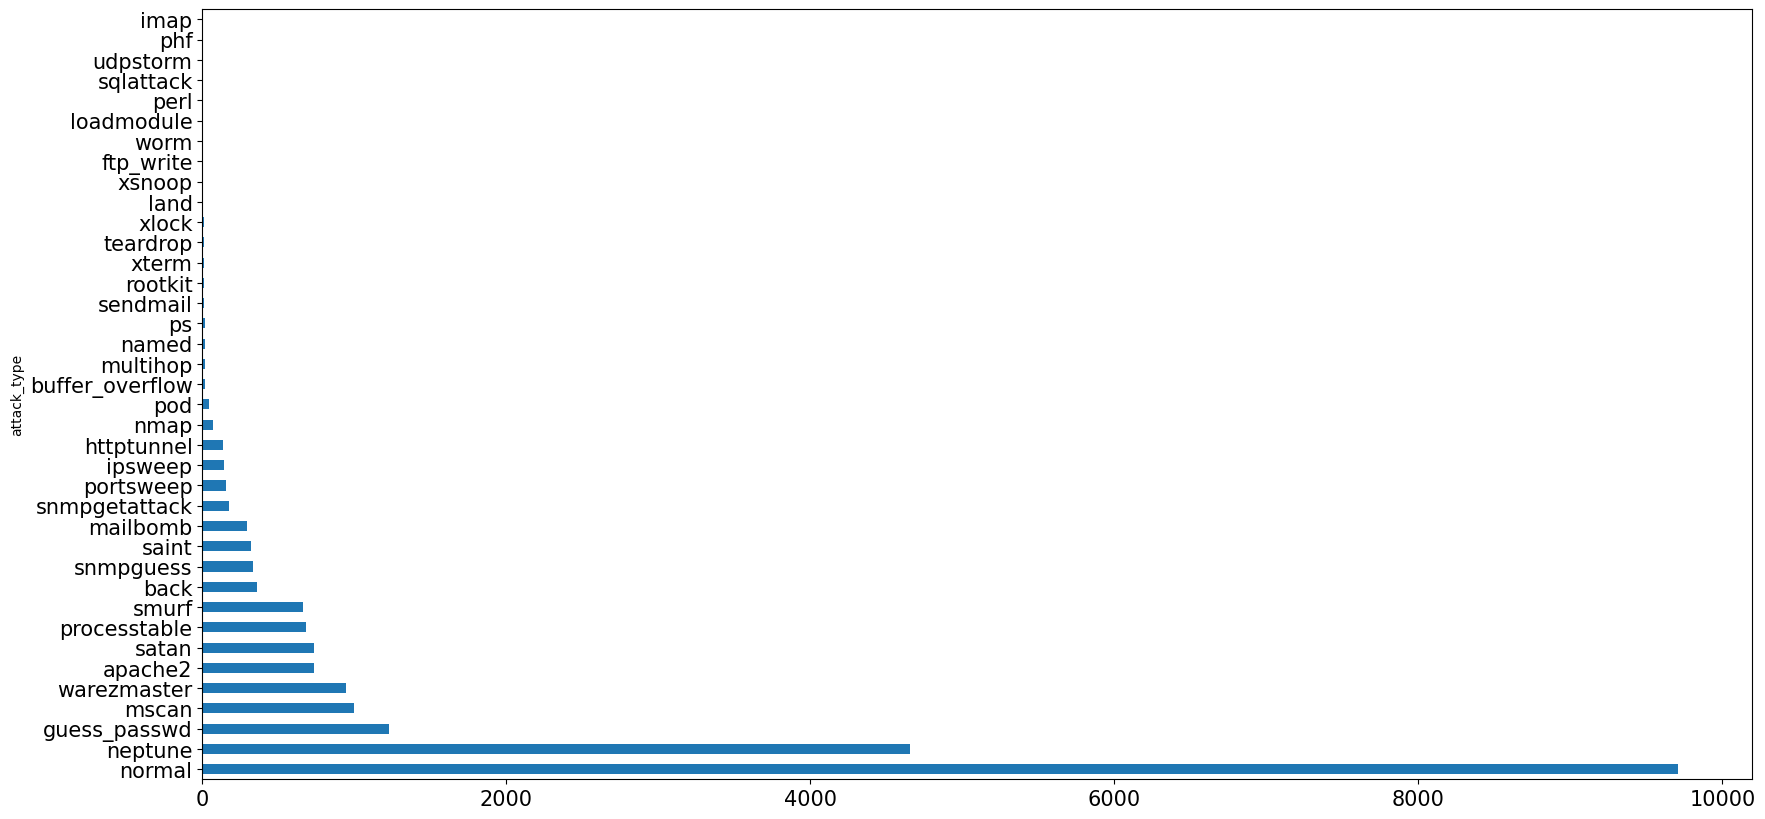

In [ ]:
test_attack_types.plot(kind='barh', figsize=(20, 10), fontsize=15)

<Axes: ylabel='attack_category'>

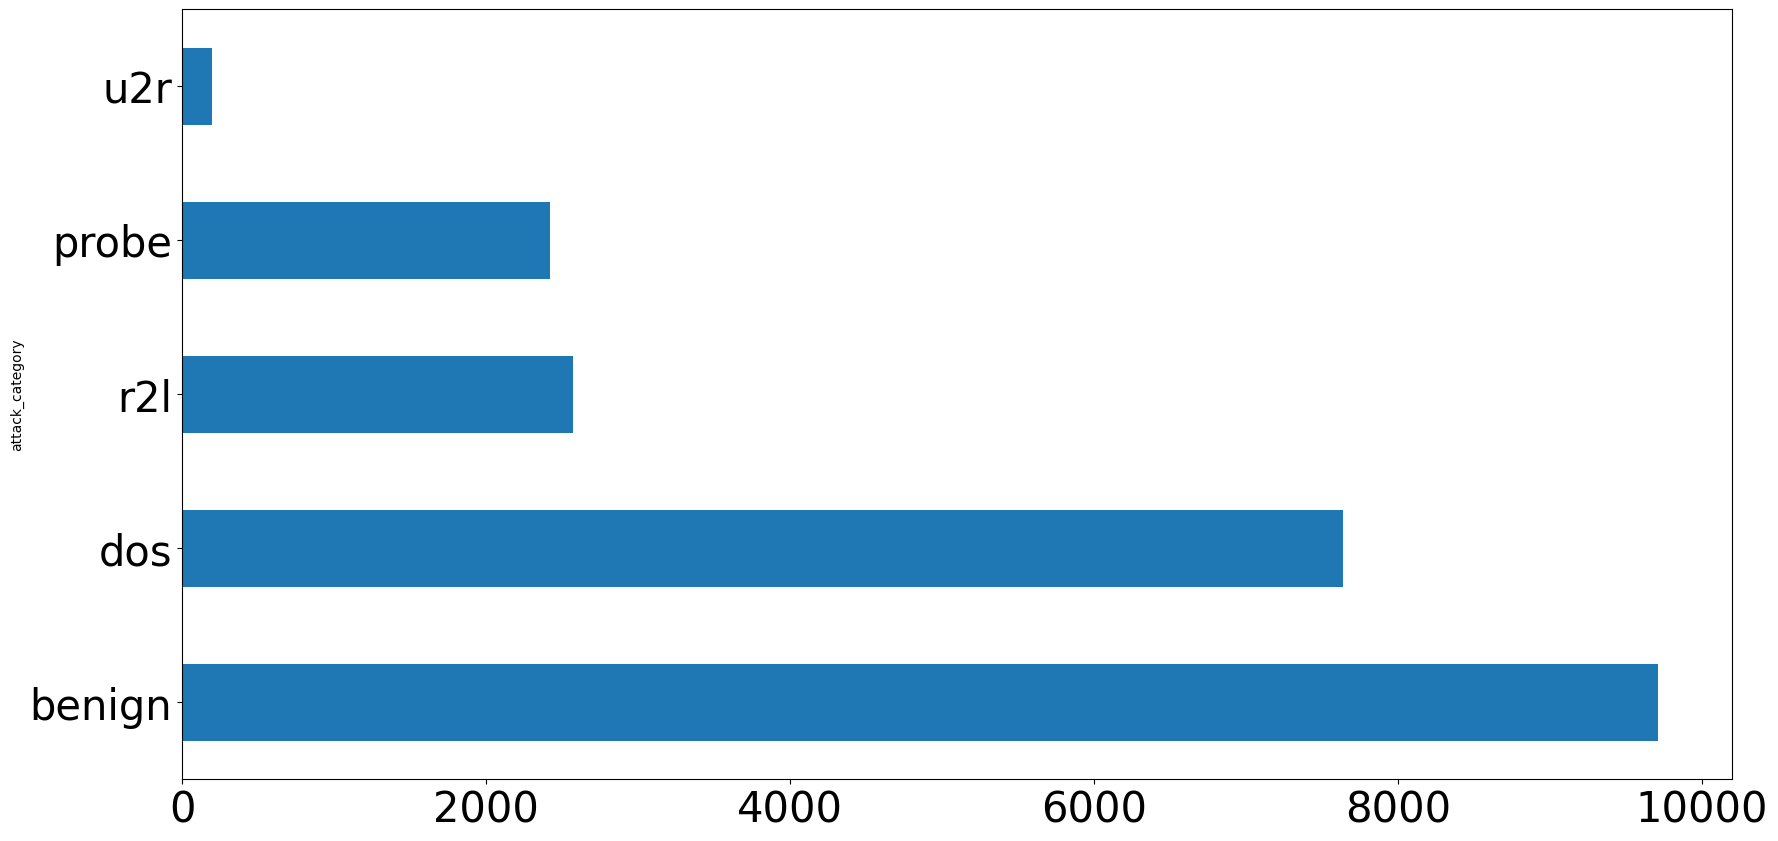

In [ ]:
test_attack_cats.plot(kind='barh', figsize=(20, 10), fontsize=30)

In [ ]:
train_df[binary_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
land,125973.0,0.000198,0.014086,0.0,0.0,0.0,0.0,1.0
logged_in,125973.0,0.395736,0.489010,0.0,0.0,0.0,1.0,1.0
root_shell,125973.0,0.001342,0.036603,0.0,0.0,0.0,0.0,1.0
su_attempted,125973.0,0.001103,0.045154,0.0,0.0,0.0,0.0,2.0
is_host_login,125973.0,0.000008,0.002817,0.0,0.0,0.0,0.0,1.0
is_guest_login,125973.0,0.009423,0.096612,0.0,0.0,0.0,0.0,1.0


In [ ]:
train_df.groupby(['su_attempted']).size()

su_attempted
0    125893
1        21
2        59
dtype: int64

In [ ]:
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()

su_attempted
0    125952
1        21
dtype: int64

In [ ]:
train_df.groupby(['num_outbound_cmds']).size()

num_outbound_cmds
0    125973
dtype: int64

In [ ]:
train_df.drop('num_outbound_cmds', axis=1, inplace=True)
test_df.drop('num_outbound_cmds', axis=1, inplace=True)
numeric_cols.remove('num_outbound_cmds')

## Data Preparation

In [ ]:
train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category', 'attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category', 'attack_type'], axis=1)

print(train_x_raw)
print(test_x_raw)

        duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_coun

In [ ]:
combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

print(combined_df)

       duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0             0        491          0     0               0       0    0   
1             0        146          0     0               0       0    0   
2             0          0          0     0               0       0    0   
3             0        232       8153     0               0       0    0   
4             0        199        420     0               0       0    0   
...         ...        ...        ...   ...             ...     ...  ...   
22539         0        794        333     0               0       0    0   
22540         0        317        938     0               0       0    0   
22541         0      54540       8314     0               0       0    2   
22542         0         42         42     0               0       0    0   
22543         0          0          0     0               0       0    0   

       num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0               

In [ ]:
#this for catboost
train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

print(train_x)

        duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        491          0     0               0       0    0   
1              0        146          0     0               0       0    0   
2              0          0          0     0               0       0    0   
3              0        232       8153     0               0       0    0   
4              0        199        420     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
125968         0          0          0     0               0       0    0   
125969         8        105        145     0               0       0    0   
125970         0       2231        384     0               0       0    0   
125971         0          0          0     0               0       0    0   
125972         0        151          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0  

In [ ]:
dummy_variables = list(set(train_x) - set(combined_df_raw))

print(dummy_variables)

['service_supdup', 'service_harvest', 'service_hostnames', 'service_http', 'service_bgp', 'service_http_443', 'service_gopher', 'service_systat', 'service_pm_dump', 'service_vmnet', 'service_rje', 'service_eco_i', 'service_pop_3', 'service_pop_2', 'service_X11', 'service_tim_i', 'service_login', 'service_auth', 'service_aol', 'service_daytime', 'service_uucp_path', 'flag_RSTR', 'service_name', 'service_kshell', 'service_netbios_ssn', 'service_iso_tsap', 'service_urp_i', 'service_http_2784', 'flag_REJ', 'protocol_type_udp', 'service_uucp', 'service_telnet', 'service_time', 'service_shell', 'service_echo', 'service_ecr_i', 'flag_RSTOS0', 'service_ldap', 'flag_S2', 'service_sunrpc', 'protocol_type_tcp', 'flag_S1', 'service_smtp', 'service_other', 'service_http_8001', 'service_klogin', 'flag_RSTO', 'service_Z39_50', 'service_ctf', 'service_ntp_u', 'service_red_i', 'service_printer', 'service_efs', 'service_nnsp', 'service_csnet_ns', 'service_link', 'service_ftp', 'service_imap4', 'flag_SH'

In [ ]:
train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_x['duration'].describe()

count    125973.00000
mean        287.14465
std        2604.51531
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       42908.00000
Name: duration, dtype: float64

### StandardScaler (平均值和標準差)
使得數據的平均值為0，方差為1
就是常態分佈，或稱高斯分布

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

count    1.259730e+05
mean     2.549477e-17
std      1.000004e+00
min     -1.102492e-01
25%     -1.102492e-01
50%     -1.102492e-01
75%     -1.102492e-01
max      1.636428e+01
dtype: float64

###MinMaxScaler 最小最大值標準化
給定了一個明確的最大值與最小值。每個特徵中的最小值變成了0，最大值變成了1。數據會縮放到到[0,1]之間。

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

count    125973.000000
mean          0.006692
std           0.060700
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64

###RobustScaler 中位數和四分位數標準化
可以有效的縮放帶有outlier(異常值)的數據，透過Robust如果數據中含有異常值在縮放中會捨去。

RobustScaler是一種四分位距的計算，以(數值-中位數)/四分位距來做資料的縮放，其中四分位距為Q3-Q1

簡單說，你的100元不是我的100元，可能你談的是100日元，而我是100新台幣，但是當我們經過相同空間縮放為美金的時候，所談就是一樣的價錢了。
https://hackmd.io/@shaoeChen/r1CQ9VY98

In [ ]:
from sklearn.preprocessing import RobustScaler
min_max_robust_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

count    125973.000000
mean          0.006692
std           0.060700
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64

### 最後選擇 standard_scaler


In [ ]:
standard_scaler = StandardScaler().fit(train_x[numeric_cols])

In [ ]:
train_x.loc[:, numeric_cols] = standard_scaler.transform(train_x[numeric_cols])
test_x.loc[:, numeric_cols] = standard_scaler.transform(test_x[numeric_cols])

train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,...,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05
mean,2.549477e-17,-4.512349e-19,7.614590e-19,0.000198,4.230328e-19,4.455945e-18,-2.244894e-17,2.989431e-18,0.395736,-6.549957e-18,...,-1.756996e-17,-5.815290e-17,-1.215514e-16,-2.374624e-17,2.899184e-17,3.068398e-17,1.711873e-17,-2.631264e-17,4.907180e-17,7.749960e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,0.014086,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.489010,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.102492e-01,-7.762241e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,-1.836071e+00,-1.044721e+00,-1.161030e+00,-4.390782e-01,-4.801968e-01,-2.891034e-01,-6.395319e-01,-6.248708e-01,-3.876346e-01,-3.763870e-01
25%,-1.102492e-01,-7.762241e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,-1.009507e+00,-9.543885e-01,-1.049659e+00,-4.390782e-01,-4.801968e-01,-2.891034e-01,-6.395319e-01,-6.248708e-01,-3.876346e-01,-3.763870e-01
50%,-1.102492e-01,-7.754745e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,7.343426e-01,-4.756270e-01,-2.504011e-02,-3.332138e-01,-4.801968e-01,-2.891034e-01,-6.395319e-01,-6.248708e-01,-3.876346e-01,-3.763870e-01
75%,-1.102492e-01,-7.715224e-03,-4.790326e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,1.000000,-1.166364e-02,...,7.343426e-01,1.258754e+00,1.066401e+00,-6.855302e-02,-2.860195e-01,-1.114257e-01,1.608759e+00,1.618955e+00,-3.876346e-01,-3.763870e-01
max,1.636428e+01,2.350675e+02,3.257486e+02,1.000000,1.174348e+01,2.088191e+02,3.571955e+01,1.104972e+02,1.000000,3.123689e+02,...,7.343426e-01,1.258754e+00,1.066401e+00,4.854138e+00,2.756092e+00,8.594782e+00,1.608759e+00,1.618955e+00,2.874410e+00,2.753914e+00


In [ ]:
train_Y_bin = train_Y.apply(lambda x: 0 if x == 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x == 'benign' else 1)

print(train_Y_bin)

0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: attack_category, Length: 125973, dtype: int64


#### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)
print(classification_report(test_Y, pred_y))

[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719
              precision    recall  f1-score   support

      benign       0.67      0.96      0.79      9711
         dos       0.96      0.79      0.86      7636
       probe       0.79      0.63      0.70      2423
         r2l       0.98      0.11      0.19      2574
         u2r       0.79      0.07      0.14       200

    accuracy                           0.76     22544
   macro avg       0.84      0.51      0.54     22544
weighted avg       0.81      0.76      0.73     22544



####KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report

classifier = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)
print(classification_report(test_Y, pred_y))

[[9457   57  193    2    2]
 [1675 5894   67    0    0]
 [ 670  156 1597    0    0]
 [2369    2   37  126   40]
 [ 176    0    4    7   13]]
0.24205997161107173
              precision    recall  f1-score   support

      benign       0.66      0.97      0.79      9711
         dos       0.96      0.77      0.86      7636
       probe       0.84      0.66      0.74      2423
         r2l       0.93      0.05      0.09      2574
         u2r       0.24      0.07      0.10       200

    accuracy                           0.76     22544
   macro avg       0.73      0.50      0.52     22544
weighted avg       0.81      0.76      0.72     22544



#### LinearSVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report

classifier = LinearSVC()
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)
print(classification_report(test_Y, pred_y))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[[9008  292  407    3    1]
 [1972 5654   10    0    0]
 [ 714  122 1500   87    0]
 [2472    1    1  100    0]
 [ 181    2    1   11    5]]
0.27843328601845285
              precision    recall  f1-score   support

      benign       0.63      0.93      0.75      9711
         dos       0.93      0.74      0.82      7636
       probe       0.78      0.62      0.69      2423
         r2l       0.50      0.04      0.07      2574
         u2r       0.83      0.03      0.05       200

    accuracy                           0.72     22544
   macro avg       0.73      0.47      0.48     22544
weighted avg       0.73      0.72      0.68     22544



###改善平衡

In [ ]:
test_Y.value_counts().apply(lambda x: x/float(len(test_Y)))

attack_category
benign    0.430758
dos       0.338715
r2l       0.114177
probe     0.107479
u2r       0.008872
Name: count, dtype: float64

In [ ]:
train_Y.value_counts().apply(lambda x: x/float(len(train_Y)))

attack_category
benign    0.534583
dos       0.364578
probe     0.092528
r2l       0.007899
u2r       0.000413
Name: count, dtype: float64

In [ ]:
pd.Series(train_Y).value_counts()

attack_category
benign    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: count, dtype: int64

####SMOTE(Synthetic Minority Over-sampling Technique)：
合成少數過採樣方法，為random oversampling改進後的方法，概念是：

對少數類的樣本進行分析，並人工合成新樣本添加到數據集中。

由於此方法並不會考量其他樣本的情況，因此若所選取的少樣類樣本周遭皆是多數類別的樣本，則所選取到的樣本可能就是噪音，使得新合成的樣本會與多數樣本產生重疊，進而導致模型分類的困難。
https://ithelp.ithome.com.tw/m/articles/10294614

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', random_state=0)
train_x_sm, train_Y_sm = sm.fit_resample(train_x, train_Y)
print(pd.Series(train_Y_sm).value_counts())

attack_category
benign    67343
dos       67343
r2l       67343
probe     67343
u2r       67343
Name: count, dtype: int64


#####smote_decisiontree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x_sm, train_Y_sm)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)
print(classification_report(test_Y, pred_y))

[[8873   68  731   35    4]
 [ 956 6225  455    0    0]
 [ 369  161 1760  133    0]
 [2341    1   89  139    4]
 [ 146    0   29   17    8]]
0.2456973030518098
              precision    recall  f1-score   support

      benign       0.70      0.91      0.79      9711
         dos       0.96      0.82      0.88      7636
       probe       0.57      0.73      0.64      2423
         r2l       0.43      0.05      0.10      2574
         u2r       0.50      0.04      0.07       200

    accuracy                           0.75     22544
   macro avg       0.63      0.51      0.50     22544
weighted avg       0.74      0.75      0.72     22544



####Undersampling:
在樣本數較多的組別中，隨機挑選若干筆數據，使各組的數據量達到相同。此方法會丟失許多訊息，因此延伸出多個方法來減少過多的訊息量損失，如：

使用Ensemble learning的方法(EasyEnsemble, BalanceCascade, NearMiss)來改善隨機抽樣導致重要樣本被刪除的問題。
 https://ithelp.ithome.com.tw/m/articles/10294614

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

mean_class_size = int(pd.Series(train_Y).value_counts().sum()/5)

ratio = {'benign': mean_class_size,
         'dos': mean_class_size,
         'probe': mean_class_size,
         'r2l': mean_class_size,
         'u2r': mean_class_size}

rus = RandomUnderSampler(sampling_strategy=ratio, random_state=0, replacement=True)
train_x_rus, train_Y_rus = rus.fit_resample(train_x_sm, train_Y_sm)
print(pd.Series(train_Y_rus).value_counts())

attack_category
benign    25194
dos       25194
probe     25194
r2l       25194
u2r       25194
Name: count, dtype: int64


#####rus_decisiontree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x_rus, train_Y_rus)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)
print(classification_report(test_Y, pred_y))

[[8948   80  672    5    6]
 [1014 5733  889    0    0]
 [ 140  170 2080   32    1]
 [2235    0   98  213   28]
 [  56    0   83   24   37]]
0.245431156848829
              precision    recall  f1-score   support

      benign       0.72      0.92      0.81      9711
         dos       0.96      0.75      0.84      7636
       probe       0.54      0.86      0.67      2423
         r2l       0.78      0.08      0.15      2574
         u2r       0.51      0.18      0.27       200

    accuracy                           0.75     22544
   macro avg       0.70      0.56      0.55     22544
weighted avg       0.79      0.75      0.73     22544



## Unsupervised Learning

### Data Anaysis

####PCA
利用正交轉換來對一系列可能相關的變量的觀測值進行線性轉換，從而投影為一系列線性不相關變量的值，這些不相關變量稱為主成分（Principal Components）。
https://zh.wikipedia.org/zh-tw/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90

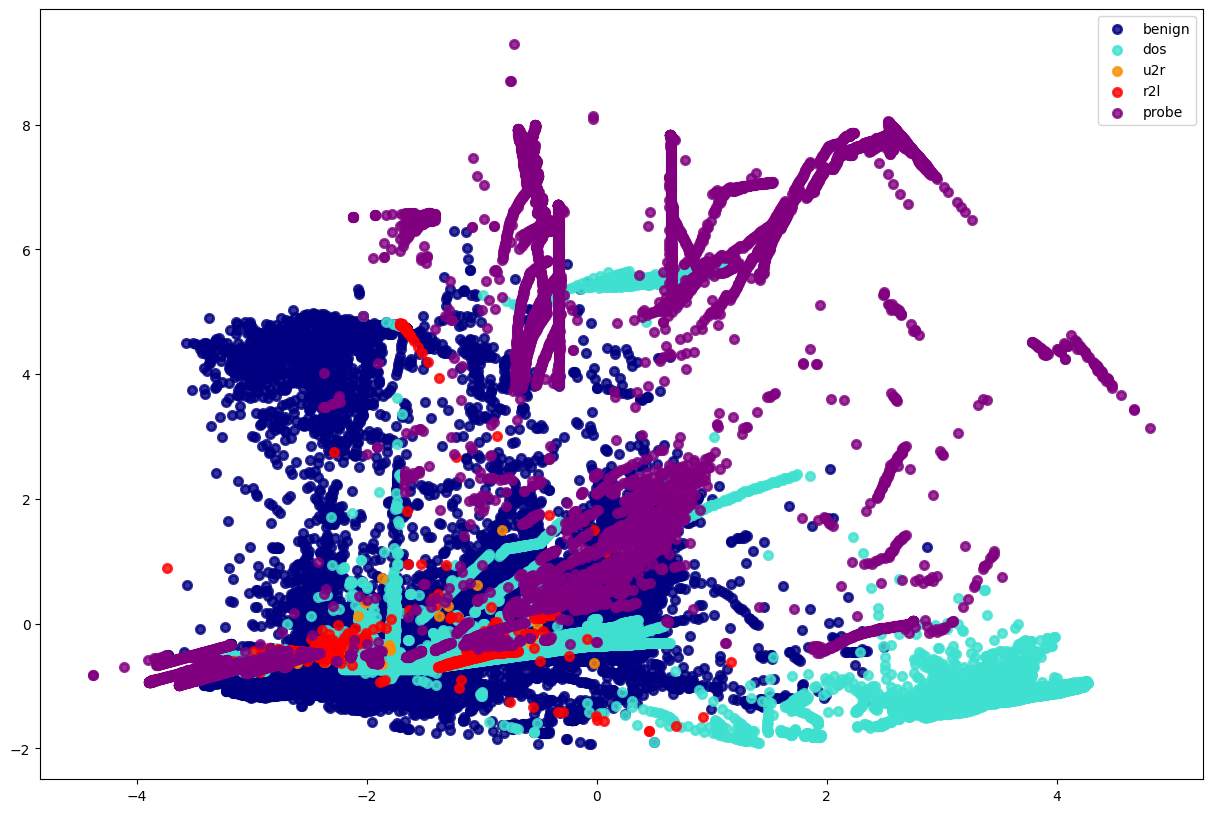

In [ ]:
from sklearn.decomposition import PCA

# Use PCA to reduce dimensionality(維度) so we can visualize the dataset on a 2d plot
pca = PCA(n_components=2)
train_x_pca_cont = pca.fit_transform(train_x[numeric_cols])

plt.figure(figsize=(15,10))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']

for color, cat in zip(colors, category.keys()):
    plt.scatter(train_x_pca_cont[train_Y==cat, 0], train_x_pca_cont[train_Y==cat, 1],
                color=color, alpha=.8, lw=2, label=cat)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

####K-means
基本上就是物以類聚，但unsupervisor只有參數不知道要怎麼分，所以要用數學的方式讓他選出K個中心點讓他們自己靠過去

K-means clustering就是希望可以最小化群內的資料和群心的誤差平方和越小越好

https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E9%9B%86%E7%BE%A4%E5%88%86%E6%9E%90-k-means-clustering-e608a7fe1b43

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


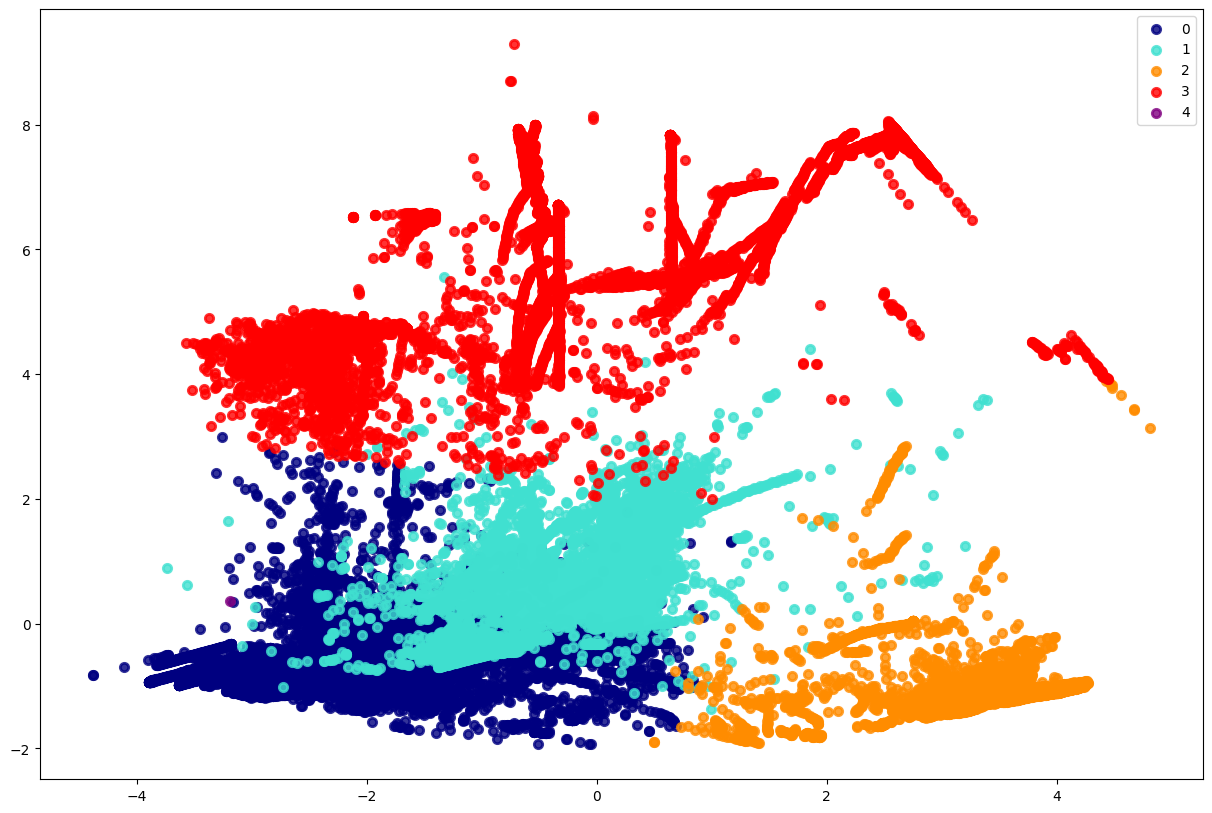

In [ ]:
# k-means (k=5, only using numeric cols) + PCA + plot

from sklearn.cluster import KMeans

# Fit the training data to a k-means clustering estimator model
kmeans = KMeans(n_clusters=5, random_state=17).fit(train_x[numeric_cols])

# Retrieve(取回) the labels assigned(被分配) to each training sample
kmeans_y = kmeans.labels_

# Plot in 2d with train_x_pca_cont
plt.figure(figsize=(15,10))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']

for color, cat in zip(colors, range(5)):
    plt.scatter(train_x_pca_cont[kmeans_y==cat, 0],
                train_x_pca_cont[kmeans_y==cat, 1],
                color=color, alpha=.8, lw=2, label=cat)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()


In [ ]:
print('Total number of features: {}'.format(len(train_x.columns)))
print('Total number of continuous features: {}'.format(len(train_x[numeric_cols].columns)))

Total number of features: 118
Total number of continuous features: 31


In [ ]:
from sklearn.metrics import completeness_score,homogeneity_score, v_measure_score

print('Completeness: {}'.format(completeness_score(test_Y, pred_y)))
print('Homogeneity: {}'.format(homogeneity_score(test_Y, pred_y)))
print('V-measure: {}'.format(v_measure_score(test_Y, pred_y)))

Completeness: 0.5580802809824345
Homogeneity: 0.4089119976241966
V-measure: 0.4719907854073641
